# Digit Recognition

## Problem Statement

Digit recognition is pretty simple multiclass classification task. We will use MNIST dataset and train convolutional neural network on it to predict which number is depicted in an image.

## Imports

In [25]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib widget

tf.random.set_seed(1337)

## Dataset

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [7]:
print('single training example: \n' + str(x_train[0]))
print('single target variable: \n' + str(y_train[0]))

single training example: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 

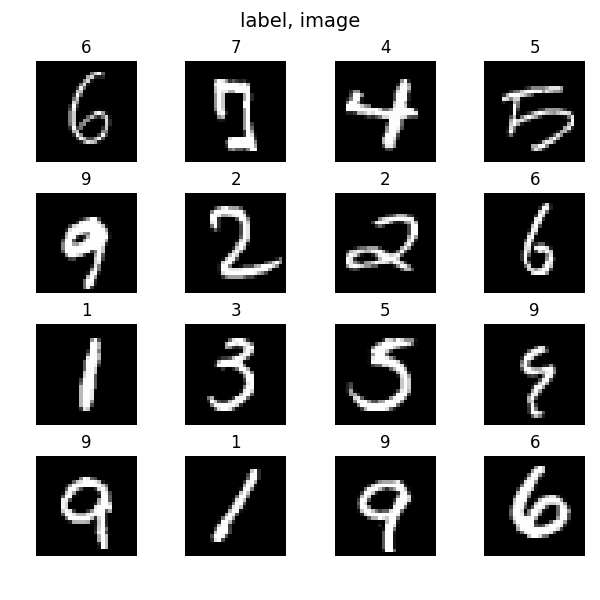

In [24]:
# visualization

fig, axes = plt.subplots(4, 4, figsize=(6, 6))
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])  #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):

    # select random indices
    random_index = np.random.randint(x_train.shape[0])
    
    # select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x_train[random_index]
    
    # display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # display the label above the image
    ax.set_title(y_train[random_index])
    ax.set_axis_off()
    fig.suptitle("label, image", fontsize=14)

In [40]:
# reshape images to 1-D vectors for dense and 1-D conv neural networks

def reshapeArray(array):

    reshaped = []

    for x in array:

        reshaped.append(x.flatten())

    return np.array(reshaped)

x_train_1d = reshapeArray(x_train)
x_test_1d = reshapeArray(x_test)

print(x_train_1d.shape)
print(x_test_1d.shape)
print(x_test_1d[0])

(60000, 784)
(10000, 784)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 222 254 254 254
 254 241 198 198 198 198 

## Dense Neural Network

In [49]:
model = tf.keras.models.Sequential(
    [               
        tf.keras.Input(shape=(784,)),
        tf.keras.layers.Dense(25, activation='relu'),
        tf.keras.layers.Dense(15, activation='relu'),
        tf.keras.layers.Dense(10, activation='linear')
    ], name = "dense_model" 
)

model.summary()

Model: "dense_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 25)                19625     
                                                                 
 dense_7 (Dense)             (None, 15)                390       
                                                                 
 dense_8 (Dense)             (None, 10)                160       
                                                                 
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________


In [42]:
[layer1, layer2, layer3] = model.layers

W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


### Dense Neural Network Training

In [50]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    x_train_1d, y_train,
    epochs=5
)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2819
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5784
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0524
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5825
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3692


### Dense Neural Network Evaluation

In [ ]:
predictions = model.predict(x_test)

1/1 [==============================] - 0s 17ms/step


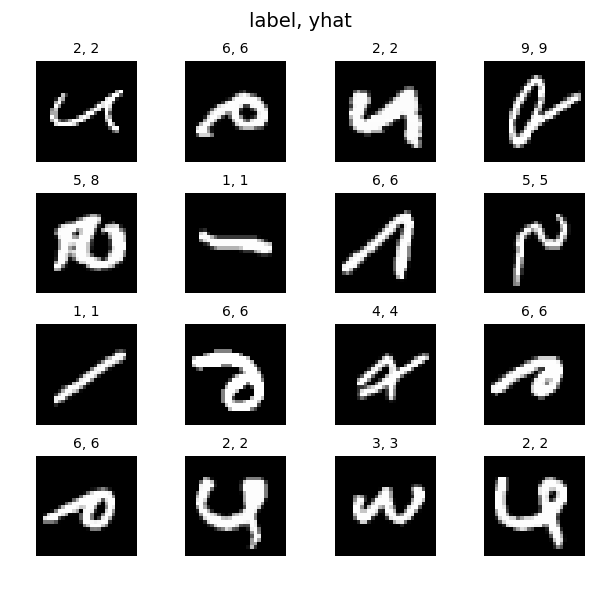

In [52]:
fig, axes = plt.subplots(4, 4, figsize=(6, 6))
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])  #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):

    # select random indices
    random_index = np.random.randint(x_test_1d.shape[0])
    
    # select rows corresponding to the random indices and
    # reshape the image
    x_random_reshaped = x_test[random_index].reshape((28, 28)).T
    
    # display the image
    ax.imshow(x_random_reshaped, cmap='gray')
    
    # predict using the dense neural network
    prediction = model.predict(x_test_1d[random_index].reshape(1, 784))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # display the label above the image
    ax.set_title(f"{y_test[random_index]}, {yhat}", fontsize=10)
    ax.set_axis_off()

fig.suptitle("label, yhat", fontsize=14)
plt.show()